In [6]:
# Документация для SKLEARN https://scikit-learn.org/stable/modules/classes.html

In [7]:
subject = "Интенсив Skillbox Data Science - предсказание курса доллара"
print(subject)

Интенсив Skillbox Data Science - предсказание курса доллара


In [8]:
import pandas as pd # pd - псевдоним

In [9]:
dataframe = pd.read_excel("resources/UsdRateTable.xlsx")

In [10]:
dataframe.head()

,nominal,data,curs,cdx
0,1,2018-01-10,57.0463,Доллар США
1,1,2018-01-11,56.8734,Доллар США
2,1,2018-01-12,56.9957,Доллар США
3,1,2018-01-13,56.6019,Доллар США
4,1,2018-01-16,56.3569,Доллар США


In [11]:
dataframe.curs.describe()

count    493.000000
mean      63.770695
std        3.108680
min       55.671700
25%       62.768600
50%       64.246900
75%       65.812900
max       69.974400
Name: curs, dtype: float64

In [12]:
dataframe.curs.plot()

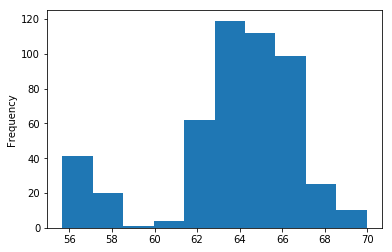

In [13]:
dataframe.curs.plot.hist()

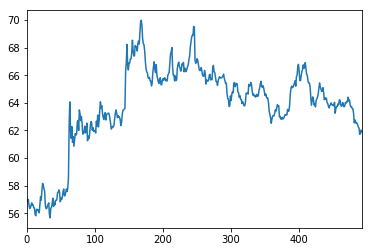

In [14]:
df = dataframe
df.curs.plot()

In [15]:
money = df.curs

In [16]:
past = 4 * 7 # Данные за 4 недели в прошлом
future = 7 # Предсказать на 7 дней вперед

In [17]:
money[100]

62.0064

In [18]:
money[45:55]

45    57.4942
46    57.5521
47    57.7033
48    57.4954
49    56.8391
50    57.1072
51    57.0039
52    57.1747
53    57.5598
54    57.7626
Name: curs, dtype: float64

In [19]:
money.describe()

count    493.000000
mean      63.770695
std        3.108680
min       55.671700
25%       62.768600
50%       64.246900
75%       65.812900
max       69.974400
Name: curs, dtype: float64

In [20]:
start = past
end = len(money) - future
print(start, end)

28 486


In [21]:
new_df = []
for i in range(start, end):
    all_columns = money[(i-past):(i+future)]
    new_df.append(list(all_columns))

In [22]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")
print(past_columns)

['past_0', 'past_1', 'past_2', 'past_3', 'past_4', 'past_5', 'past_6', 'past_7', 'past_8', 'past_9', 'past_10', 'past_11', 'past_12', 'past_13', 'past_14', 'past_15', 'past_16', 'past_17', 'past_18', 'past_19', 'past_20', 'past_21', 'past_22', 'past_23', 'past_24', 'past_25', 'past_26', 'past_27']


In [23]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")
print(future_columns)

['future_0', 'future_1', 'future_2', 'future_3', 'future_4', 'future_5', 'future_6']


In [24]:
transformed_df = pd.DataFrame(new_df, columns=(past_columns+future_columns))

In [25]:
transformed_df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000
5,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,...,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041
6,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,...,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011
7,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,56.1840,...,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122
8,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,56.1840,56.2613,...,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122,56.9359
9,56.6261,56.4115,56.3888,55.9288,55.8288,56.2908,56.2914,56.1840,56.2613,56.0408,...,55.6717,56.3742,56.4334,56.6616,57.1000,56.5041,56.8011,56.6122,56.9359,56.9372


In [26]:
# Обучающая выборка (учебник)
x = transformed_df[past_columns][:-1] # То, на основании чего предсказываем [:-1] - Значит все кроме последней строки
y = transformed_df[future_columns][:-1] # То, что предсказываем

In [27]:
# Тестовая выборка (проверка)
x_test = transformed_df[past_columns][-1:] # Только последняя строка
y_test = transformed_df[future_columns][-1:]

In [28]:
x_test

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
457,63.9121,63.853,64.2009,64.2101,63.8881,63.7542,63.773,64.0213,63.843,63.7101,...,63.8135,63.7185,63.7244,63.5788,63.5653,63.2257,62.5544,62.7686,62.5326,62.5831


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
prediction = LinReg.predict(x_test)

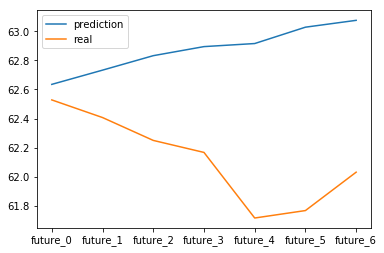

In [32]:
import matplotlib.pyplot as plt
plt.plot(prediction[0], label="prediction")
plt.plot(y_test.iloc[0], label="real") # .iloc[0] - чтобы взять из датафрейма только одну строку массивом
plt.legend()

In [33]:
from sklearn.metrics import mean_absolute_error # Средняя абсолютная ошибка

In [34]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.7495339183028429

In [37]:
# Результат плохой, используем другую модель - KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [38]:
KNN = KNeighborsRegressor(n_neighbors=2)

In [39]:
KNN.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

MAE 0.21615714285714308


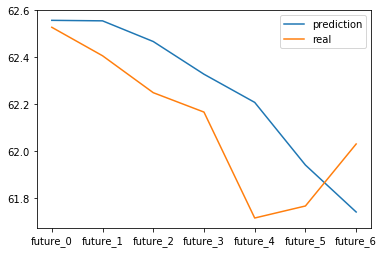

In [40]:
prediction = KNN.predict(x_test)
print("MAE", mean_absolute_error(prediction[0], y_test.iloc[0]))
plt.plot(prediction[0], label="prediction")
plt.plot(y_test.iloc[0], label="real") # .iloc[0] - чтобы взять из датафрейма только одну строку массивом
plt.legend()

In [41]:
# Пробуем другую модель (нейронную сеть) MLPRegressor
from sklearn.neural_network import MLPRegressor

In [42]:
MLP = MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(50, 100, 30)) # Случайное число с которого начинает обучение модель
# максимально число итераций и слои нейронных сетей (3 слоя по 50 нейронов) - влияет на обучение сильнее всего
MLP.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

MAE 1.8042774284387622


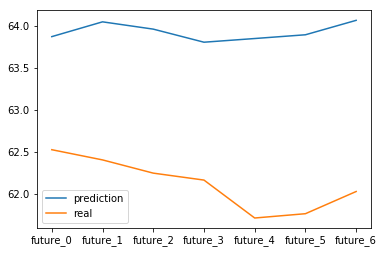

In [43]:
prediction = MLP.predict(x_test)
print("MAE", mean_absolute_error(prediction[0], y_test.iloc[0]))
plt.plot(prediction[0], label="prediction")
plt.plot(y_test.iloc[0], label="real") # .iloc[0] - чтобы взять из датафрейма только одну строку массивом
plt.legend()

In [44]:
# Последовательно, без вложенных циклов (для теста) выбираем минимальные значения параметров, на примере alpha:
alpha_min = 0
i = 0.0001
MAE = 100
while i < 0.0015:
    MLP = MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(50, 100, 30), alpha=i)
    MLP.fit(x, y)
    MAE_new = mean_absolute_error(prediction[0], y_test.iloc[0])
    if MAE_new < MAE:
        MAE = MAE_new
        alpha_min = i
    i += 0.0001
print("MAE: ", MAE)
print("alpha: ", alpha_min)
# Принимаем alpha = 0.0001

MAE:  1.8042774284387622
alpha:  0.0001


In [46]:
# Подбор с помощью GridSearchCV - поиск по сетке параметров. CV - кроссвалидация
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [50, 100, 500],
    "max_depth": [3, 5, 15]
}
GS = GridSearchCV(RFR, param_grid, scoring='neg_mean_absolute_error', cv=4) # На вход RFR регресс, сетка параметров, способ оценки
# (средняя абс. ошибка), а также кросс-валидация 4 - четыре варианта разбиения параметров
GS.fit(x, y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 500], 'max_depth': [3, 5, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [47]:
GS.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [48]:
GS.best_score_
# самое лучшее знач. MAE

-1.5653435594397171

MAE 1.1800278604282022


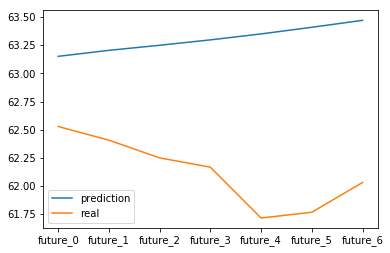

In [49]:
model = GS.best_estimator_

prediction = model.predict(x_test)
print("MAE", mean_absolute_error(prediction[0], y_test.iloc[0]))
plt.plot(prediction[0], label="prediction")
plt.plot(y_test.iloc[0], label="real") # .iloc[0] - чтобы взять из датафрейма только одну строку массивом
plt.legend()

In [50]:
# в GS можно передать список, например
list(range(10, 100, 5)) # от 10 до 100, через 5. Можно прямо передать в GS

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]